# Proyecto final datos de canasta basica 
### Autor: Anthony Navarro Aguilar

Demostración del uso de pandas y operaciones basicas para graficar datos de un archivo csv

Importación de librerias

In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import os

Instancia Variables globales 

In [13]:
# ------------------- 1. VARIABLES GLOBALES -------------------
FILENAME = "datos.csv"  # Nombre del archivo a cargar
COLUMNAS = ['Año', 'Artículo', 'Cantidad_Vendida', 'Precio_Promedio', 'Provincia']  # Columnas esperadas
ANALISIS_Y = 'Cantidad_Vendida'  # Columna para análisis principal
FILTRAR_ANIO = 2020  # Valor por defecto para filtrar datos por año
TOP_ARTICULOS = 5  # Número de artículos a mostrar en el top

Se carga los datos del archivo csv en una variable 

In [14]:
# ------------------- 2. VERIFICACIÓN Y LECTURA DEL ARCHIVO -------------------
if os.path.exists(FILENAME):
    df = pd.read_csv(FILENAME)
    print("Datos cargados exitosamente.")
else:
    print(f"Error: El archivo '{FILENAME}' no existe.")
    df = pd.DataFrame(columns=COLUMNAS)

if not df.empty:
    # ------------------- 3. LIMPIEZA DE DATOS -------------------
    print("Limpieza de datos...")
    # Eliminar duplicados
    df.drop_duplicates(inplace=True)
    # Llenar valores faltantes con valores predeterminados
    df.fillna({'Cantidad_Vendida': 0, 'Precio_Promedio': 1.0}, inplace=True)
    # Convertir tipos de datos si es necesario
    if 'Año' in df.columns and 'Cantidad_Vendida' in df.columns and 'Precio_Promedio' in df.columns:
        df['Año'] = df['Año'].astype(int)
        df['Cantidad_Vendida'] = df['Cantidad_Vendida'].astype(int)
        df['Precio_Promedio'] = df['Precio_Promedio'].astype(float)
else:
    print("Error: El archivo no contiene datos o columnas esperadas.")


Datos cargados exitosamente.
Limpieza de datos...


Operaciones que el usuario puede realizar en consola 


--- MENÚ DE OPCIONES ---
1. Ver los primeros datos
2. Mostrar top de artículos más vendidos
3. Mostrar gráfico de consumo total por año
4. Filtrar datos por año
5. Modificar columna 'Cantidad_Vendida' para un artículo
6. Mostrar gráfico de ventas por producto seleccionado
7. Salir

Seleccione un producto de la lista:
1. Arroz
2. Frijoles
3. Azúcar
4. Leche
5. Pan
6. Aceite
7. Huevos
8. Pasta
9. Carne
10. Verduras

Mostrando ventas anuales para el producto: Azúcar


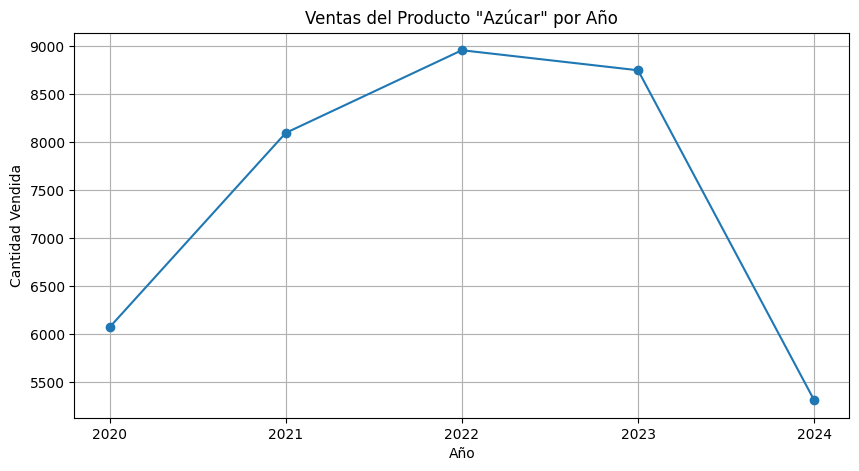


--- MENÚ DE OPCIONES ---
1. Ver los primeros datos
2. Mostrar top de artículos más vendidos
3. Mostrar gráfico de consumo total por año
4. Filtrar datos por año
5. Modificar columna 'Cantidad_Vendida' para un artículo
6. Mostrar gráfico de ventas por producto seleccionado
7. Salir
Saliendo del programa...


In [15]:
# ------------------- 4. VARIABLES LOCALES PARA ANÁLISIS -------------------
while not df.empty:
    print("\n--- MENÚ DE OPCIONES ---")
    print("1. Ver los primeros datos")
    print("2. Mostrar top de artículos más vendidos")
    print("3. Mostrar gráfico de consumo total por año")
    print("4. Filtrar datos por año")
    print("5. Modificar columna 'Cantidad_Vendida' para un artículo")
    print("6. Mostrar gráfico de ventas por producto seleccionado")
    print("7. Salir")
    
    
    opcion = input("Seleccione una opción: ")
    
    if opcion == '1':
        # Mostrar las primeras filas del DataFrame
        print("\nPrimeros datos:")
        print(df.head())
        
    elif opcion == '2':
        # Mostrar los artículos con mayor cantidad vendida
        print("\nTop de artículos más vendidos:")
        top_vendidos = df.groupby('Artículo')[ANALISIS_Y].sum().nlargest(TOP_ARTICULOS)
        print(top_vendidos)
        
    elif opcion == '3':
        # Gráfico de consumo total por año
        print("\nGráfico de consumo total por año:")
        if 'Año' in df.columns and ANALISIS_Y in df.columns:
            plt.figure(figsize=(10, 5))
            consumo_anual = df.groupby('Año')[ANALISIS_Y].sum()
            plt.plot(consumo_anual.index, consumo_anual.values, marker='o')
            plt.title('Consumo Total de Artículos por Año')
            plt.xlabel('Año')
            plt.ylabel('Cantidad Vendida')
            plt.grid()
            plt.xticks(consumo_anual.index)
            plt.show()
        else:
            print("Error: Columnas necesarias no disponibles.")
        
    elif opcion == '4':
        # Filtrar por año con interacción del usuario
        anio_filtro = input("Ingrese el año a filtrar: ")
        if anio_filtro.isdigit():
            anio_filtro = int(anio_filtro)
            if anio_filtro in df['Año'].values:
                df_filtrado = df[df['Año'] == anio_filtro]
                print(f"\nDatos filtrados para el año {anio_filtro}:")
                print(df_filtrado)
            else:
                print("El año ingresado no está en los datos.")
        else:
            print("Debe ingresar un valor numérico para el año.")
        
    elif opcion == '5':
        # Modificar un valor de 'Cantidad_Vendida' para un artículo
        articulo_modificar = input("Ingrese el nombre del artículo a modificar: ")
        if articulo_modificar in df['Artículo'].values:
            nueva_cantidad = input("Ingrese la nueva cantidad vendida: ")
            if nueva_cantidad.isdigit():
                nueva_cantidad = int(nueva_cantidad)
                df.loc[df['Artículo'] == articulo_modificar, 'Cantidad_Vendida'] = nueva_cantidad
                print(f"Cantidad vendida actualizada para {articulo_modificar}.")
            else:
                print("Debe ingresar un valor numérico para la cantidad.")
        else:
            print("El artículo ingresado no existe en los datos.")
            
    elif opcion == '6':
        # Mostrar gráfico de ventas por producto seleccionado
        print("\nSeleccione un producto de la lista:")
        productos = df['Artículo'].unique()
        for i, producto in enumerate(productos):
            print(f"{i + 1}. {producto}")
        seleccion = input("Ingrese el número del producto: ")
        if seleccion.isdigit() and 1 <= int(seleccion) <= len(productos):
            producto_seleccionado = productos[int(seleccion) - 1]
            print(f"\nMostrando ventas anuales para el producto: {producto_seleccionado}")
            ventas_producto = df[df['Artículo'] == producto_seleccionado].groupby('Año')[ANALISIS_Y].sum()
            plt.figure(figsize=(10, 5))
            plt.plot(ventas_producto.index, ventas_producto.values, marker='o')
            plt.title(f'Ventas del Producto "{producto_seleccionado}" por Año')
            plt.xlabel('Año')
            plt.ylabel('Cantidad Vendida')
            plt.grid()
            plt.xticks(ventas_producto.index)
            plt.show()
        else:
            print("Selección inválida. Intente nuevamente.")
        
    elif opcion == '7':
        # Salir del programa
        print("Saliendo del programa...")
        break
    else:
        print("Opción inválida. Intente nuevamente.")

